In [1]:
import geopandas as gpd

lakes_gdf = gpd.read_file('Data/NH_Wildlife_Action_Plan_2020_-_Aquatic_Habitat_(Lakes_Ponds).geojson')
wetlands_gdf = gpd.read_file('Data/NH_Wetlands_Geopackage.gpkg', layer='NH_Wetlands')

/Users/jasoncurtis/miniconda3/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


In [2]:
# Check CRS
print("Lakes CRS:", lakes_gdf.crs)
print("Wetlands CRS:", wetlands_gdf.crs)

# Reproject wetlands to match lakes CRS if they differ
# if lakes_gdf.crs != wetlands_gdf.crs:
#    wetlands_gdf = wetlands_gdf.to_crs(lakes_gdf.crs)


Lakes CRS: EPSG:4326
Wetlands CRS: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [3]:
wetlands_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
lakes_gdf = lakes_gdf.to_crs("EPSG:3857")

In [5]:
lakes_gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
lakes_gdf

,OBJECTID,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,Elevation,ReachCode,NHFGID,Acres,...,Hab_guide,NHLAKECLASS,SPPCONCERN,HerringStock,WAPSPECIES,BridleShiner,EBT,Shape_Length,Shape_Area,geometry
0,1,135911428,2005-05-30 00:00:00+00:00,2.0,00865984,Canobie Lake,66.0,01070006001700,1,375.079270,...,https://easterndivision.s3.amazonaws.com/Fresh...,warm/cool Lake,P,N,BDS,N,N,30160.838492,1.633775e+07,"POLYGON ((-7931458.357 5281493.316, -7931458.3..."
1,2,135999029,2005-06-03 00:00:00+00:00,2.0,00867486,Highland Lake,394.0,01070003001395,2,696.567601,...,https://easterndivision.s3.amazonaws.com/Fresh...,warm/cool Lake,N,N,,N,N,104138.838593,3.034122e+07,"POLYGON ((-8024729.029 5327157.846, -8024708.1..."
2,3,76910235,2009-09-10 00:00:00+00:00,2.0,00871403,"Armington, Lake",409.0,01080104002175,3,152.290770,...,https://easterndivision.s3.amazonaws.com/Fresh...,warm/cool Lake,N,N,,N,N,17949.879143,6.633413e+06,"POLYGON ((-8012009.287 5458891.607, -8012000.0..."
3,4,92797697,2003-08-04 00:00:00+00:00,2.0,00870846,White Oak Pond,178.0,01070001001186,4,294.759365,...,https://easterndivision.s3.amazonaws.com/Fresh...,warm/cool Lake,N,N,,N,N,26406.131271,1.283883e+07,"POLYGON ((-7966791.672 5420843.059, -7966782.4..."
4,5,135908715,2005-05-30 00:00:00+00:00,2.0,00869253,Pleasant Lake,176.0,01070006002402,5,478.901845,...,https://easterndivision.s3.amazonaws.com/Fresh...,warm/cool Lake,N,N,,N,N,24571.317108,2.086004e+07,"POLYGON ((-7932395.337 5339748.024, -7932450.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15645,15646,{1B4D03BE-137D-42BC-9550-8EEFDB831C45},2019-02-27 00:00:00+00:00,2.0,,,0.0,01060003013351,15648,3.667919,...,None,warm/cool Pond,N,N,,N,N,1747.681543,1.597739e+05,"POLYGON ((-7878694.461 5316161.737, -7878682.3..."
15646,15647,{D4BBA0D8-195F-4007-A067-F02EF6D1308B},2019-02-27 00:00:00+00:00,2.0,,,0.0,01060003013355,15649,2.136736,...,None,warm/cool Pond,N,N,,N,N,1235.842555,9.307585e+04,"POLYGON ((-7904845.492 5312958.308, -7904841.1..."
15647,15648,{0099D427-6989-4ACA-9C26-0221B5F5EBE9},2019-02-27 00:00:00+00:00,2.0,,,0.0,01060003013326,15650,7.633106,...,None,warm/cool Pond,N,N,,N,N,3381.663397,3.324967e+05,"POLYGON ((-7917679.253 5378031.849, -7917706.2..."
15648,15649,{79439CA7-D11F-4866-A280-13FF3183DFE0},2019-02-27 00:00:00+00:00,2.0,,,0.0,01060003013350,15651,2.943044,...,None,warm/cool Pond,N,N,,N,N,1546.444710,1.281985e+05,"POLYGON ((-7879011.230 5316235.111, -7878979.8..."


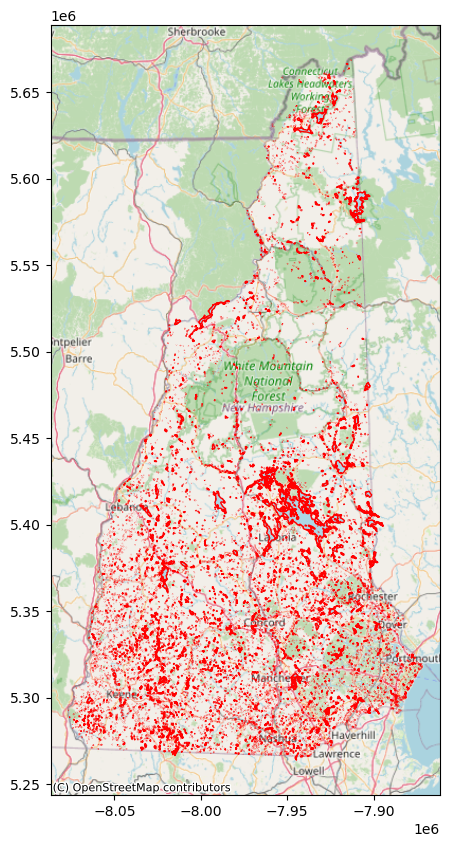

In [7]:
import matplotlib.pyplot as plt
import contextily as ctx
fig, ax = plt.subplots(figsize=(10, 10))

lakes_gdf.plot(ax=ax, color='lightblue', edgecolor='red', label='Lakes')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [17]:
wetlands_gdf = wetlands_gdf.to_crs("EPSG:3857")

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10, 10))

wetlands_gdf.plot(ax=ax1, figsize=(10, 10), color="red")
ctx.add_basemap(ax=ax1, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [26]:
lakes = wetlands_gdf[wetlands_gdf['WETLAND_TYPE'].isin(["Lake", "Freshwater Pond"])]
wetlands = wetlands_gdf[wetlands_gdf['WETLAND_TYPE'].isin(["Estuarine and Marine Wetland",
                                                          "Freshwater Emergent Wetland",
                                                          "Freshwater Forested/Shrub Wetland"])]

In [27]:
lakes

,ATTRIBUTE,WETLAND_TYPE,ACRES,NWI_ID,geometry
0,L1UBH,Lake,51.356344,202409CSw{D91EC9A6-D26F-481B-AB64-124F1AA091A0...,"MULTIPOLYGON (((-7972298.749 5623063.785, -797..."
142,PUBF,Freshwater Pond,1.132397,202409CSw{497CC3B8-6853-4ADB-99A3-1000B179DB08...,"MULTIPOLYGON (((-7961226.493 5603785.562, -796..."
143,PUBF,Freshwater Pond,1.191154,202409CSw{5AD203F7-A8D9-4E4B-A7C5-13C317EE0D94...,"MULTIPOLYGON (((-7961199.110 5604403.779, -796..."
144,PUBF,Freshwater Pond,0.183405,202409CSw{849F44AB-5186-43C7-9319-3ED37E62D728...,"MULTIPOLYGON (((-7962132.967 5610274.348, -796..."
145,PUBF,Freshwater Pond,0.689543,202409CSw{D18536CB-778E-47F0-B15E-F5B1966D9EA9...,"MULTIPOLYGON (((-7962331.085 5615622.109, -796..."
...,...,...,...,...,...
258728,PABHb,Freshwater Pond,19.655202,202409CSw{E35B3D68-2495-4C68-9DB4-6C2EE5D1DEF5...,"MULTIPOLYGON (((-8062581.103 5337089.625, -806..."
258738,PUBHx,Freshwater Pond,0.214879,202409CSw{62ADAF6B-13F8-44C3-8C72-F079D54AC5FA...,"MULTIPOLYGON (((-8063861.376 5332079.577, -806..."
258745,PUBHb,Freshwater Pond,5.445047,202409CSw{BD920FF0-F48B-4D73-A075-A9574CD8687B...,"MULTIPOLYGON (((-8050660.056 5344799.038, -805..."
258746,L2ABHb,Lake,18.916084,202409CSw{F84C13BC-EE07-442F-9DA1-035EE3AE6276...,"MULTIPOLYGON (((-8044158.176 5347617.844, -804..."


In [28]:
wetlands

,ATTRIBUTE,WETLAND_TYPE,ACRES,NWI_ID,geometry
1,PEM1/SS1C,Freshwater Emergent Wetland,2.172405,202409CSw{BA6CBAD3-3995-42C5-BD75-13EF28888966...,"MULTIPOLYGON (((-7970783.735 5623008.171, -797..."
2,PEM1/SS1E,Freshwater Emergent Wetland,6.293036,202409CSw{4B841E15-3327-4FDF-A8BB-22AD968EBFF4...,"MULTIPOLYGON (((-7961892.627 5612642.816, -796..."
3,PEM1A,Freshwater Emergent Wetland,1.336244,202409CSw{B24C3487-861A-4E6E-ACEA-7219C211A6CB...,"MULTIPOLYGON (((-7959563.697 5606617.885, -795..."
4,PEM1A,Freshwater Emergent Wetland,0.633088,202409CSw{5358BB0E-F6B1-428A-A98A-0E0064D6C780...,"MULTIPOLYGON (((-7961711.944 5614494.074, -796..."
5,PEM1C,Freshwater Emergent Wetland,0.114382,202409CSw{5A0E1FE7-530C-4D16-A5D9-FA2992563A4C...,"MULTIPOLYGON (((-7961752.601 5609711.896, -796..."
...,...,...,...,...,...
258753,PSS1E,Freshwater Forested/Shrub Wetland,1.190226,202409CSw{B8F625D4-25DC-49A2-831C-2E8156E4DF1C...,"MULTIPOLYGON (((-8051884.869 5290723.197, -805..."
258754,PSS3E,Freshwater Forested/Shrub Wetland,0.746129,202409CSw{DA60C5C6-68FF-4063-928C-42E6A64203CB...,"MULTIPOLYGON (((-8040880.829 5340610.283, -804..."
258755,PFO4E,Freshwater Forested/Shrub Wetland,1.211764,202409CSw{16BF32A6-DAC9-42BF-8CEB-89CB38A96978...,"MULTIPOLYGON (((-8048695.817 5347440.563, -804..."
258756,PSS1E,Freshwater Forested/Shrub Wetland,5.087593,202409CSw{E38B339D-50D0-4E76-B082-78848ADB76A7...,"MULTIPOLYGON (((-8059462.585 5351654.332, -805..."


In [24]:
lakes

,ATTRIBUTE,WETLAND_TYPE,ACRES,NWI_ID,geometry
0,L1UBH,Lake,51.356344,202409CSw{D91EC9A6-D26F-481B-AB64-124F1AA091A0...,"MULTIPOLYGON (((-7972298.749 5623063.785, -797..."
344,L1UBH,Lake,28.355885,202409CSw{C99BF748-D4CB-4879-BB3C-586618206B65...,"MULTIPOLYGON (((-7905332.397 5654791.252, -790..."
345,L1UBHh,Lake,37.149631,202409CSw{645666E6-2F7B-432A-BE11-D79D04BBBB27...,"MULTIPOLYGON (((-7904908.295 5670337.137, -790..."
1147,L1UBH,Lake,10.306705,202409CSw{69A83213-FA25-4BD3-BFF0-E7A9BEE16F36...,"MULTIPOLYGON (((-7903899.603 5642628.244, -790..."
1162,L1UBHh,Lake,3446.143120,202409CSw{F5FA1911-9903-4481-BF99-58B34A486824...,"MULTIPOLYGON (((-7903724.699 5632470.118, -790..."
...,...,...,...,...,...
258693,L2ABH,Lake,91.632162,202409CSw{629B0F59-AC7B-4CBB-A224-1E1BEF555EF2...,"MULTIPOLYGON (((-8064964.463 5285291.776, -806..."
258716,L2EM2F,Lake,4.151259,202409CSw{3A2EB4A6-363B-41A8-987C-A775C4672A85...,"MULTIPOLYGON (((-8062793.793 5289240.624, -806..."
258725,L2ABHb,Lake,27.809847,202409CSw{3A9585BE-9921-424B-B31C-4CCB9AA575DC...,"MULTIPOLYGON (((-8062009.973 5334422.124, -806..."
258746,L2ABHb,Lake,18.916084,202409CSw{F84C13BC-EE07-442F-9DA1-035EE3AE6276...,"MULTIPOLYGON (((-8044158.176 5347617.844, -804..."


In [31]:
lakes['buffer'] = lakes.geometry.buffer(500)
lakes_buffers = lakes.set_geometry('buffer')

/Users/jasoncurtis/miniconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [33]:
wetlands_within_buffers = gpd.sjoin(wetlands, lakes, how='inner', predicate='intersects')

In [38]:
wetlands_within_buffers['wetland_area'] = wetlands_within_buffers.geometry.area

In [48]:
wetland_coverage = wetlands_within_buffers.groupby('NWI_ID_right')['wetland_area'].sum().reset_index()

In [49]:
lakes = lakes.merge(wetland_coverage, left_on='NWI_ID', right_on='NWI_ID_right', how='left')
lakes['wetland_area'] = lakes['wetland_area'].fillna(0)

In [50]:
wetlands_within_buffers

,ATTRIBUTE_left,WETLAND_TYPE_left,ACRES_left,NWI_ID_left,geometry,index_right,ATTRIBUTE_right,WETLAND_TYPE_right,ACRES_right,NWI_ID_right,buffer,wetland_area
6,PEM1C,Freshwater Emergent Wetland,0.938397,202409CSw{5539C852-5C9E-4C4B-8115-5B1345959A1E...,"MULTIPOLYGON (((-7961872.981 5612074.578, -796...",12648,PUBH,Freshwater Pond,1.560469,202409CSw{BDD49395-8335-4C4A-A3D6-F71AFC33B5AC...,"POLYGON ((-7961267.320 5612102.778, -7961262.4...",7579.380608
24,PEM1Eb,Freshwater Emergent Wetland,0.864696,202409CSw{2DE834B8-FFB9-493B-BF9F-1952F637A63D...,"MULTIPOLYGON (((-7969492.487 5606065.964, -796...",147,PUBFb,Freshwater Pond,0.561514,202409CSw{4A011DB6-452D-42A1-9A5F-32D766923DE3...,"POLYGON ((-7969483.201 5605360.988, -7969494.4...",6974.899392
29,PEM1Eb,Freshwater Emergent Wetland,0.678389,202409CSw{E9C439B7-D85B-4665-ADBE-49ABCE71FF88...,"MULTIPOLYGON (((-7972222.563 5614017.507, -797...",154,PUBFb,Freshwater Pond,1.490636,202409CSw{C4B6FE5C-4838-405E-85E9-093CF7D90123...,"POLYGON ((-7971605.809 5613852.788, -7971606.5...",5481.755708
33,PEM1Eb,Freshwater Emergent Wetland,0.873317,202409CSw{14A7820E-22AA-40E6-898F-1A742B65531E...,"MULTIPOLYGON (((-7964224.468 5613229.783, -796...",156,PUBFb,Freshwater Pond,1.344868,202409CSw{0F4868F2-4691-4CE2-BDDE-C1E075DE8745...,"POLYGON ((-7964614.252 5612815.331, -7964639.5...",7055.600262
45,PEM1Fb,Freshwater Emergent Wetland,0.223223,202409CSw{9816D0DC-878F-4E31-864A-4320D84BEF6B...,"MULTIPOLYGON (((-7972804.741 5613845.559, -797...",153,PUBFb,Freshwater Pond,0.406722,202409CSw{A3277277-DDD4-44C1-B4A5-582875D6D033...,"POLYGON ((-7972651.996 5613365.701, -7972685.5...",1803.681313
...,...,...,...,...,...,...,...,...,...,...,...,...
258749,PFO4/SS1E,Freshwater Forested/Shrub Wetland,3.517130,202409CSw{33A95E17-A0BF-4C4F-89A6-A7C47D9E044F...,"MULTIPOLYGON (((-8048339.080 5339479.276, -804...",257157,PUBHx,Freshwater Pond,0.257343,202409CSw{2780AF65-1D98-46E6-A85B-733796737E1B...,"POLYGON ((-8048913.666 5339547.145, -8048911.7...",26778.872935
258749,PFO4/SS1E,Freshwater Forested/Shrub Wetland,3.517130,202409CSw{33A95E17-A0BF-4C4F-89A6-A7C47D9E044F...,"MULTIPOLYGON (((-8048339.080 5339479.276, -804...",257156,PUBHx,Freshwater Pond,0.219285,202409CSw{94E4385B-AEDE-4FFC-A743-B36B2C16492B...,"POLYGON ((-8048879.416 5339721.051, -8048867.9...",26778.872935
258751,PFO4/SS1E,Freshwater Forested/Shrub Wetland,11.950168,202409CSw{33712B2C-773B-4245-AC73-8F431D96DDE1...,"MULTIPOLYGON (((-8055578.358 5283705.910, -805...",257469,PUBHx,Freshwater Pond,0.326481,202409CSw{23ADD921-84AF-4551-A0D0-7CE68BF45DC2...,"POLYGON ((-8055490.494 5283641.692, -8055506.3...",89922.699415
258753,PSS1E,Freshwater Forested/Shrub Wetland,1.190226,202409CSw{B8F625D4-25DC-49A2-831C-2E8156E4DF1C...,"MULTIPOLYGON (((-8051884.869 5290723.197, -805...",257484,PUBH,Freshwater Pond,0.407107,202409CSw{A836B583-8AC4-48AF-9FBF-E616F8939677...,"POLYGON ((-8052447.968 5290923.254, -8052440.4...",8968.964952


In [43]:
lakes

,ATTRIBUTE,WETLAND_TYPE,ACRES,NWI_ID,geometry,buffer
0,L1UBH,Lake,51.356344,202409CSw{D91EC9A6-D26F-481B-AB64-124F1AA091A0...,"MULTIPOLYGON (((-7972298.749 5623063.785, -797...","POLYGON ((-7973035.269 5622708.409, -7973079.2..."
142,PUBF,Freshwater Pond,1.132397,202409CSw{497CC3B8-6853-4ADB-99A3-1000B179DB08...,"MULTIPOLYGON (((-7961226.493 5603785.562, -796...","POLYGON ((-7961785.663 5603871.833, -7961785.4..."
143,PUBF,Freshwater Pond,1.191154,202409CSw{5AD203F7-A8D9-4E4B-A7C5-13C317EE0D94...,"MULTIPOLYGON (((-7961199.110 5604403.779, -796...","POLYGON ((-7961749.046 5604418.029, -7961752.8..."
144,PUBF,Freshwater Pond,0.183405,202409CSw{849F44AB-5186-43C7-9319-3ED37E62D728...,"MULTIPOLYGON (((-7962132.967 5610274.348, -796...","POLYGON ((-7961997.137 5609793.151, -7962017.0..."
145,PUBF,Freshwater Pond,0.689543,202409CSw{D18536CB-778E-47F0-B15E-F5B1966D9EA9...,"MULTIPOLYGON (((-7962331.085 5615622.109, -796...","POLYGON ((-7962302.538 5615117.142, -7962309.5..."
...,...,...,...,...,...,...
258728,PABHb,Freshwater Pond,19.655202,202409CSw{E35B3D68-2495-4C68-9DB4-6C2EE5D1DEF5...,"MULTIPOLYGON (((-8062581.103 5337089.625, -806...","POLYGON ((-8063579.478 5336758.150, -8063581.3..."
258738,PUBHx,Freshwater Pond,0.214879,202409CSw{62ADAF6B-13F8-44C3-8C72-F079D54AC5FA...,"MULTIPOLYGON (((-8063861.376 5332079.577, -806...","POLYGON ((-8064243.356 5331687.416, -8064253.6..."
258745,PUBHb,Freshwater Pond,5.445047,202409CSw{BD920FF0-F48B-4D73-A075-A9574CD8687B...,"MULTIPOLYGON (((-8050660.056 5344799.038, -805...","POLYGON ((-8051328.206 5344480.304, -8051332.6..."
258746,L2ABHb,Lake,18.916084,202409CSw{F84C13BC-EE07-442F-9DA1-035EE3AE6276...,"MULTIPOLYGON (((-8044158.176 5347617.844, -804...","POLYGON ((-8045221.686 5346782.083, -8045219.7..."


In [47]:
wetland_coverage

,NWI_ID_left,wetland_area
0,202409CSw{000043A9-CE9D-4A63-B21B-935036DC8532...,9863.409316
1,202409CSw{00020260-9F7E-4EF7-A7EC-A2CDDFD513AC...,5023.924024
2,202409CSw{00040F38-6227-478D-8900-C12D7841021B...,2037.234595
3,202409CSw{0005E4F9-5E57-47CB-B565-D137589912CA...,1486.449017
4,202409CSw{0008F555-AF88-4D79-BFB6-0B5E572944FB...,31826.538100
...,...,...
25208,202409CSw{FFF2DCE3-7CE0-4AB7-95B0-0BD6E0F2EB8D...,4316.688336
25209,202409CSw{FFF5B92D-E28D-4156-9124-308B3984B95D...,11004.037859
25210,202409CSw{FFF989F3-74D9-482B-9233-C87CD6B05DCF...,9588.034874
25211,202409CSw{FFFBD924-A248-41B9-8D19-2FA10BD38224...,32802.397680


In [51]:
# Calculate buffer area
lakes['buffer_area'] = lakes['buffer'].area

# Compute wetland density (wetland area per buffer area)
lakes['wetland_density'] = lakes['wetland_area'] / lakes['buffer_area']


/var/folders/2x/gf83jrn56297rb1nd6bt7z9h0000gn/T/ipykernel_80470/1615886761.py:6: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/2x/gf83jrn56297rb1nd6bt7z9h0000gn/T/ipykernel_80470/1615886761.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


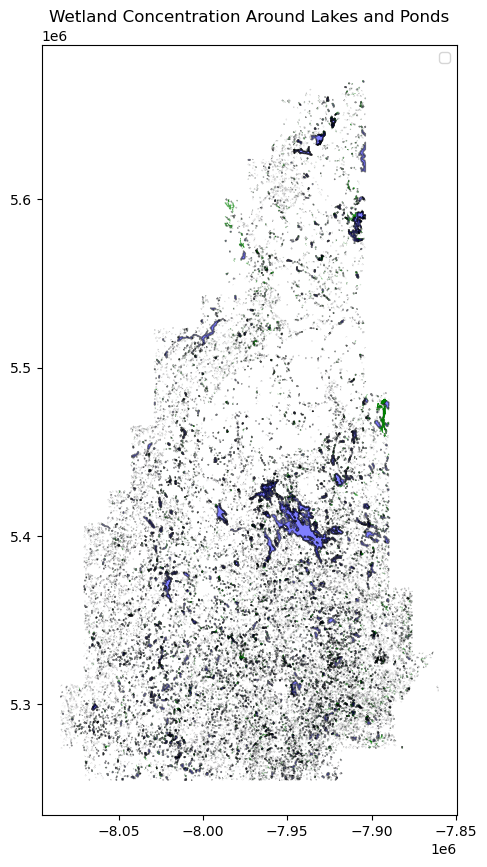

In [52]:
import matplotlib.pyplot as plt

# Plot lakes/ponds and surrounding wetlands
ax = lakes.plot(color='blue', alpha=0.5, edgecolor='k', figsize=(10, 10), label='Lakes/Ponds')
wetlands_within_buffers.plot(ax=ax, color='green', alpha=0.7, label='Wetlands')
plt.legend()
plt.title('Wetland Concentration Around Lakes and Ponds')
plt.show()


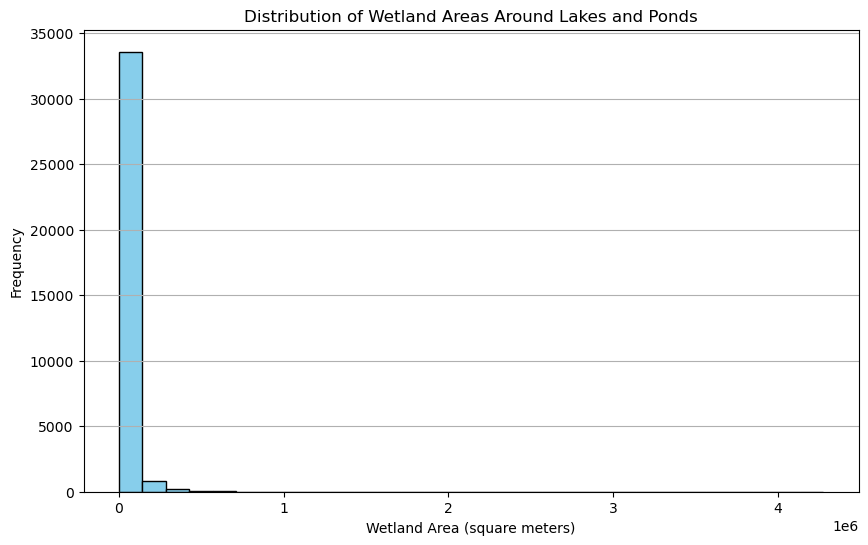

In [66]:
import matplotlib.pyplot as plt

# Plot histogram of wetland areas
plt.figure(figsize=(10, 6))
filtered_lakes_2['wetland_area'].plot.hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Wetland Areas Around Lakes and Ponds')
plt.xlabel('Wetland Area (square meters)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


/Users/jasoncurtis/miniconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


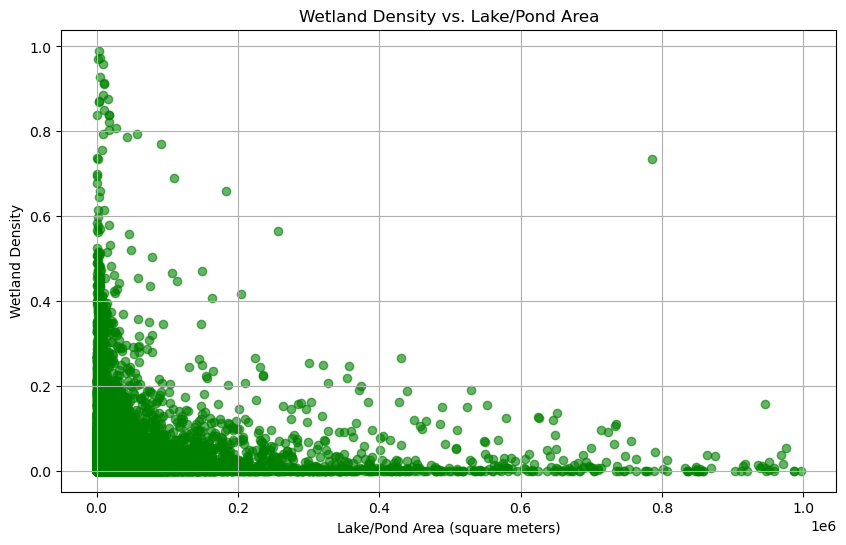

In [65]:
# Add lake/pond geometry area if not already present
filtered_lakes = lakes[lakes['wetland_density'] <= 1.0]
filtered_lakes['lake_area'] = lakes.geometry.area
filtered_lakes_2 = filtered_lakes[filtered_lakes['lake_area'] <= 1000000.0]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_lakes_2['lake_area'], filtered_lakes_2['wetland_density'], alpha=0.6, color='green')
plt.title('Wetland Density vs. Lake/Pond Area')
plt.xlabel('Lake/Pond Area (square meters)')
plt.ylabel('Wetland Density')
plt.grid()
plt.show()


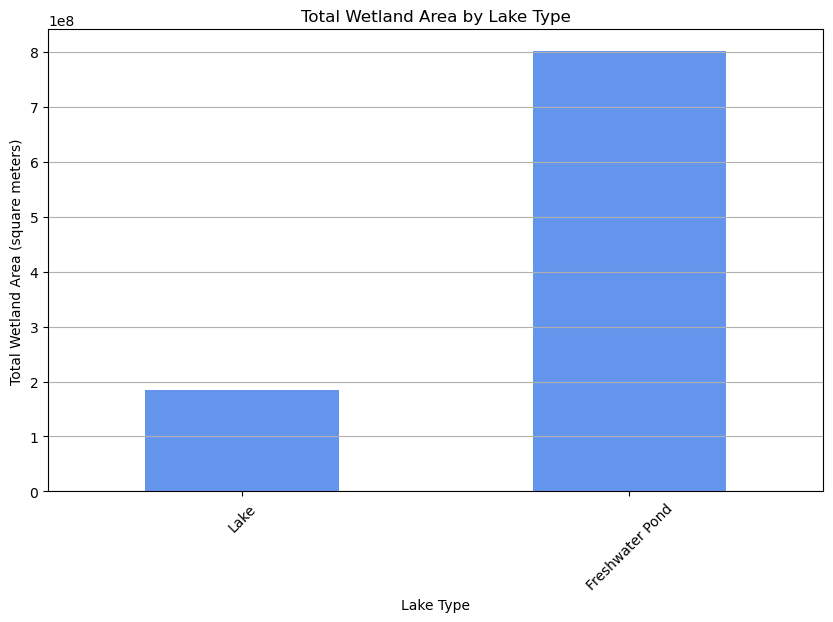

In [55]:
# Group by lake type and calculate total wetland area
wetland_by_type = lakes.groupby('WETLAND_TYPE')['wetland_area'].sum().sort_values()

# Bar plot
plt.figure(figsize=(10, 6))
wetland_by_type.plot(kind='bar', color='cornflowerblue')
plt.title('Total Wetland Area by Lake Type')
plt.xlabel('Lake Type')
plt.ylabel('Total Wetland Area (square meters)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


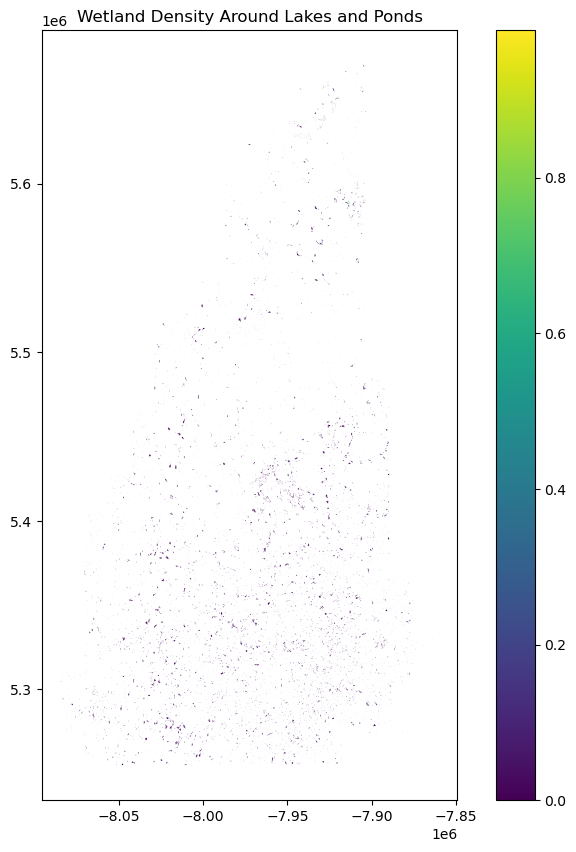

In [68]:
# Plot lakes/ponds with color representing wetland density
ax = filtered_lakes_2.plot(column='wetland_density', cmap='viridis', legend=True, figsize=(10, 10))
plt.title('Wetland Density Around Lakes and Ponds')
plt.show()


In [63]:
filtered_lakes['lake_area'].max()

317937863.7288257

In [69]:
summary = filtered_lakes_2[['wetland_area', 'wetland_density', 'lake_area']].describe()

In [70]:
summary

,wetland_area,wetland_density,lake_area
count,3.478100e+04,34781.000000,34781.000000
mean,2.044444e+04,0.017718,17565.685146
std,6.813721e+04,0.052442,63859.389559
min,0.000000e+00,0.000000,0.026643
25%,0.000000e+00,0.000000,1135.952859
50%,0.000000e+00,0.000000,2435.309931
75%,1.286777e+04,0.012340,7720.253370
max,4.276396e+06,0.989791,996907.019802
